<a href="https://colab.research.google.com/github/vasudev006/S2Codebase/blob/main/EXPERIMENT_NO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXPERIMENT NO.4

Evaluating divergence and curl of a vector field

>**Case :** Find the divergence and curl of the vector field $F=xy \textbf{i}+yz  \textbf{j}+zx \textbf{k}$ and plot the vector fields.



---




######Solution

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.vector import CoordSys3D

#N=CoordSys3D('N')

In [7]:
#Define the cordinate system
N=sp.vector.CoordSys3D('N')

F=(N.x*N.y)*N.i+(N.y*N.z)*N.j+(N.z*N.x)*N.k
F

N.x*N.y*N.i + N.y*N.z*N.j + N.x*N.z*N.k

In [8]:
#Compute the divergence
divergence_F=sp.vector.divergence(F)
divergence_F


N.x + N.y + N.z

In [10]:
#Compute the curl
curl_F=sp.vector.curl(F)
curl_F

(-N.y)*N.i + (-N.z)*N.j + (-N.x)*N.k

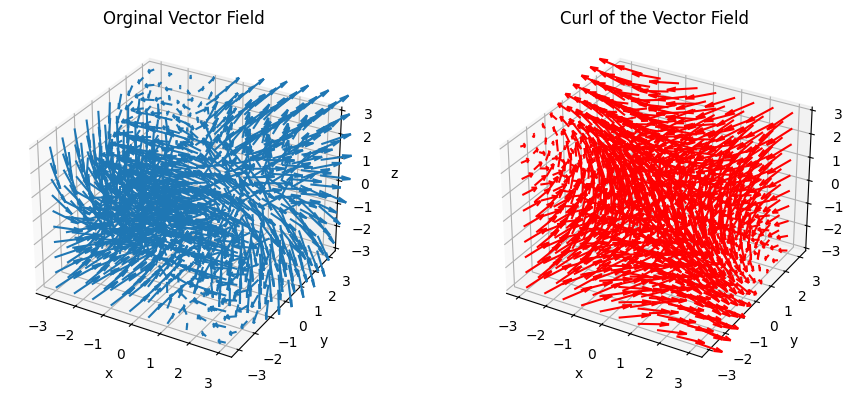

In [61]:
#Define the grid
x_vals=np.linspace(-3,3,10)
y_vals=np.linspace(-3,3,10)
z_vals=np.linspace(-3,3,10)
x,y,z=np.meshgrid(x_vals,y_vals,z_vals)

#Initialize arrays to store the vector field components
U=np.zeros_like(x)
V=np.zeros_like(y)
W=np.zeros_like(z)

#Initialize arrays to store the curl components
Curl_U=np.zeros_like(x)
Curl_V=np.zeros_like(y)
Curl_W=np.zeros_like(z)

#Evaluate the vector field and curl at each grid point
for i in range(x.shape[0]):
  for j in range(x.shape[1]):
    for k in range(x.shape[2]):
      point={N.x:x[i,j,k],N.y:y[i,j,k],N.z:z[i,j,k]}
      F_evaluated =F.subs(point)
      U[i,j,k]=float(F_evaluated.dot(N.i))
      V[i,j,k]=float(F_evaluated.dot(N.j))
      W[i,j,k]=float(F_evaluated.dot(N.k))
      curl_evaluated=curl_F.subs(point)
      Curl_U[i,j,k]=float(curl_evaluated.dot(N.i))
      Curl_V[i,j,k]=float(curl_evaluated.dot(N.j))
      Curl_W[i,j,k]=float(curl_evaluated.dot(N.k))


#Plot the orginal vector field

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(x,y,z,U,V,W,length=1,normalize=True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Orginal Vector Field')

#Plot the curl of the vector field

ax2=fig.add_subplot(122,projection='3d')
ax2.quiver(x,y,z,Curl_U,Curl_V,Curl_W,length=1,normalize=True,color=('r'))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Curl of the Vector Field')

plt.tight_layout()
plt.show()

###Application Problem:Vorticity and Fluid Flow in a pipe

####Problem statement
Consider a cylindrical pipe through which fluid is flowing .The velocity of the fluid inside the pipe is described by a three-dimensional vector field $V(x,y,z)=(-y,x,0)$

(i)Determine the divergence $\nabla.V$,which measures the net rate of fluoid flow out of a point , at any point$(x,y,z)$ in the pipe.

(ii)Determine the curl $\nabla\times V$,which measures the rotation or swirling strenght of the fluid around a point5 , ata any point $(x,y,z)$ in the pipe.


In [56]:
# Define the coordinate system
N = sp.vector.CoordSys3D('N')

# Define the velocity vector field V
V = (-N.y) * N.i + (N.x) * N.j + (0) * N.k
V

(-N.y)*N.i + N.x*N.j

In [57]:
# Compute the divergence of V
divergence_V = sp.vector.divergence(V)
divergence_V

0

In [58]:
# Compute the curl of V
curl_V = sp.vector.curl(V)
curl_V

2*N.k

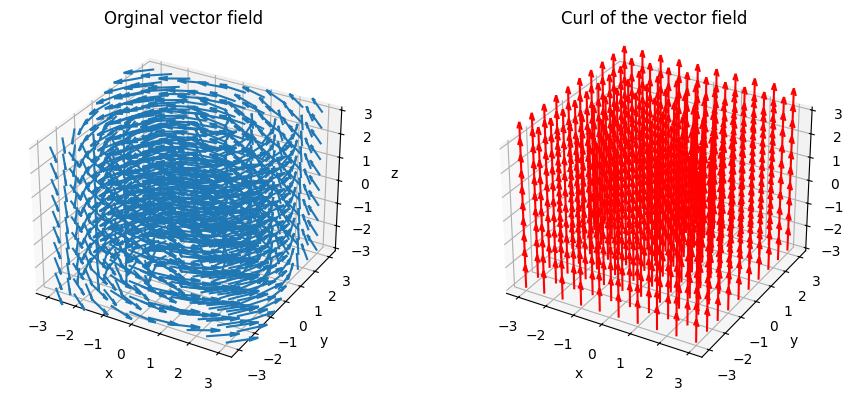

In [60]:
#Define the grid
x_vals=np.linspace(-3,3,10)
y_vals=np.linspace(-3,3,10)
z_vals=np.linspace(-3,3,10)
x,y,z=np.meshgrid(x_vals,y_vals,z_vals)

#Initialize arrays to store the vector field components
U=np.zeros_like(x)
V_comp=np.zeros_like(y)
W=np.zeros_like(z)

#Initialize arrays to store the curl components
Curl_U=np.zeros_like(x)
Curl_V_comp=np.zeros_like(y)
Curl_W=np.zeros_like(z)

#Evaluate the vector field and curl at each grid point
for i in range(x.shape[0]):
  for j in range(x.shape[1]):
    for k in range(x.shape[2]):
      point={N.x:x[i,j,k],N.y:y[i,j,k],N.z:z[i,j,k]}
      V_evaluated = V.subs(point)
      U[i,j,k]=float(V_evaluated.dot(N.i))
      V_comp[i,j,k]=float(V_evaluated.dot(N.j))
      W[i,j,k]=float(V_evaluated.dot(N.k))
      curl_V_evaluated=curl_V.subs(point)
      Curl_U[i,j,k]=float(curl_V_evaluated.dot(N.i))
      Curl_V_comp[i,j,k]=float(curl_V_evaluated.dot(N.j))
      Curl_W[i,j,k]=float(curl_V_evaluated.dot(N.k))


#Plot the original vector field

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(x,y,z,U,V_comp,W,length=1,normalize=True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Orginal vector field')

#Plot the curl of the vector field

ax2=fig.add_subplot(122,projection='3d')
ax2.quiver(x,y,z,Curl_U,Curl_V_comp,Curl_W,length=1,normalize=True,color=('r'))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Curl of the vector field')

plt.tight_layout()
plt.show()

**Electromagentic Field distribution in space**

In an electromagnetic system the electric field intensity at a point in space is
represented by the vector field

$E(x,y,z)=2x \textbf{i}+(x+y)\textbf{j}+3z\textbf{k}$

*Compute the divergence of the electric field vcetor.
*Compute the curl of the elctric field to check whether circulsating field exists.
*Visualize the vector field and its curl using python.

In [67]:
# Define the coordinate system
N = sp.vector.CoordSys3D('N')

# Define the electric field vector E
E = (2 * N.x) * N.i + (N.x + N.y) * N.j + (3 * N.z) * N.k
E

2*N.x*N.i + (N.x + N.y)*N.j + 3*N.z*N.k

In [68]:
# Compute the divergence of E
divergence_E = sp.vector.divergence(E)
divergence_E

6

In [69]:
# Compute the curl of E
curl_E = sp.vector.curl(E)
curl_E

N.k

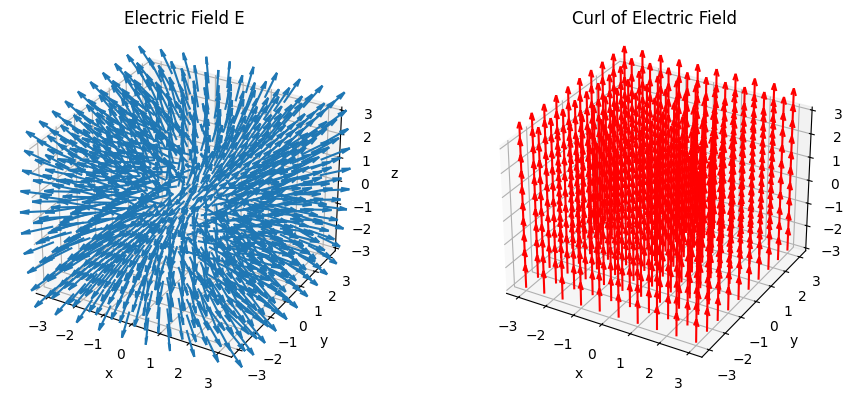

In [66]:
# Define the grid for visualization
x_vals = np.linspace(-3, 3, 10)
y_vals = np.linspace(-3, 3, 10)
z_vals = np.linspace(-3, 3, 10)
x, y, z = np.meshgrid(x_vals, y_vals, z_vals)

# Initialize arrays to store the vector field components
U_E = np.zeros_like(x)
V_E = np.zeros_like(y)
W_E = np.zeros_like(z)

# Initialize arrays to store the curl components
Curl_U_E = np.zeros_like(x)
Curl_V_E = np.zeros_like(y)
Curl_W_E = np.zeros_like(z)

# Evaluate the electric field and curl at each grid point
for i in range(x.shape[0]):
  for j in range(x.shape[1]):
    for k in range(x.shape[2]):
      point = {N.x: x[i, j, k], N.y: y[i, j, k], N.z: z[i, j, k]}
      E_evaluated = E.subs(point)
      U_E[i, j, k] = float(E_evaluated.dot(N.i))
      V_E[i, j, k] = float(E_evaluated.dot(N.j))
      W_E[i, j, k] = float(E_evaluated.dot(N.k))
      curl_E_evaluated = curl_E.subs(point)
      Curl_U_E[i, j, k] = float(curl_E_evaluated.dot(N.i))
      Curl_V_E[i, j, k] = float(curl_E_evaluated.dot(N.j))
      Curl_W_E[i, j, k] = float(curl_E_evaluated.dot(N.k))


# Plot the original electric field
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(x, y, z, U_E, V_E, W_E, length=1, normalize=True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Electric Field E')

# Plot the curl of the electric field
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(x, y, z, Curl_U_E, Curl_V_E, Curl_W_E, length=1, normalize=True, color=('r'))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Curl of Electric Field')

plt.tight_layout()
plt.show()